In [133]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

os.chdir("/Users/jacobrichards/Desktop/DS_DA_Projects/90+_DaysPastDue/90+DPD_files")

train = pd.read_csv("FITB_train.csv", na_values=["", "NA"])

test = pd.read_csv("FITB_test.csv", na_values=["", "NA"])

check the distributions

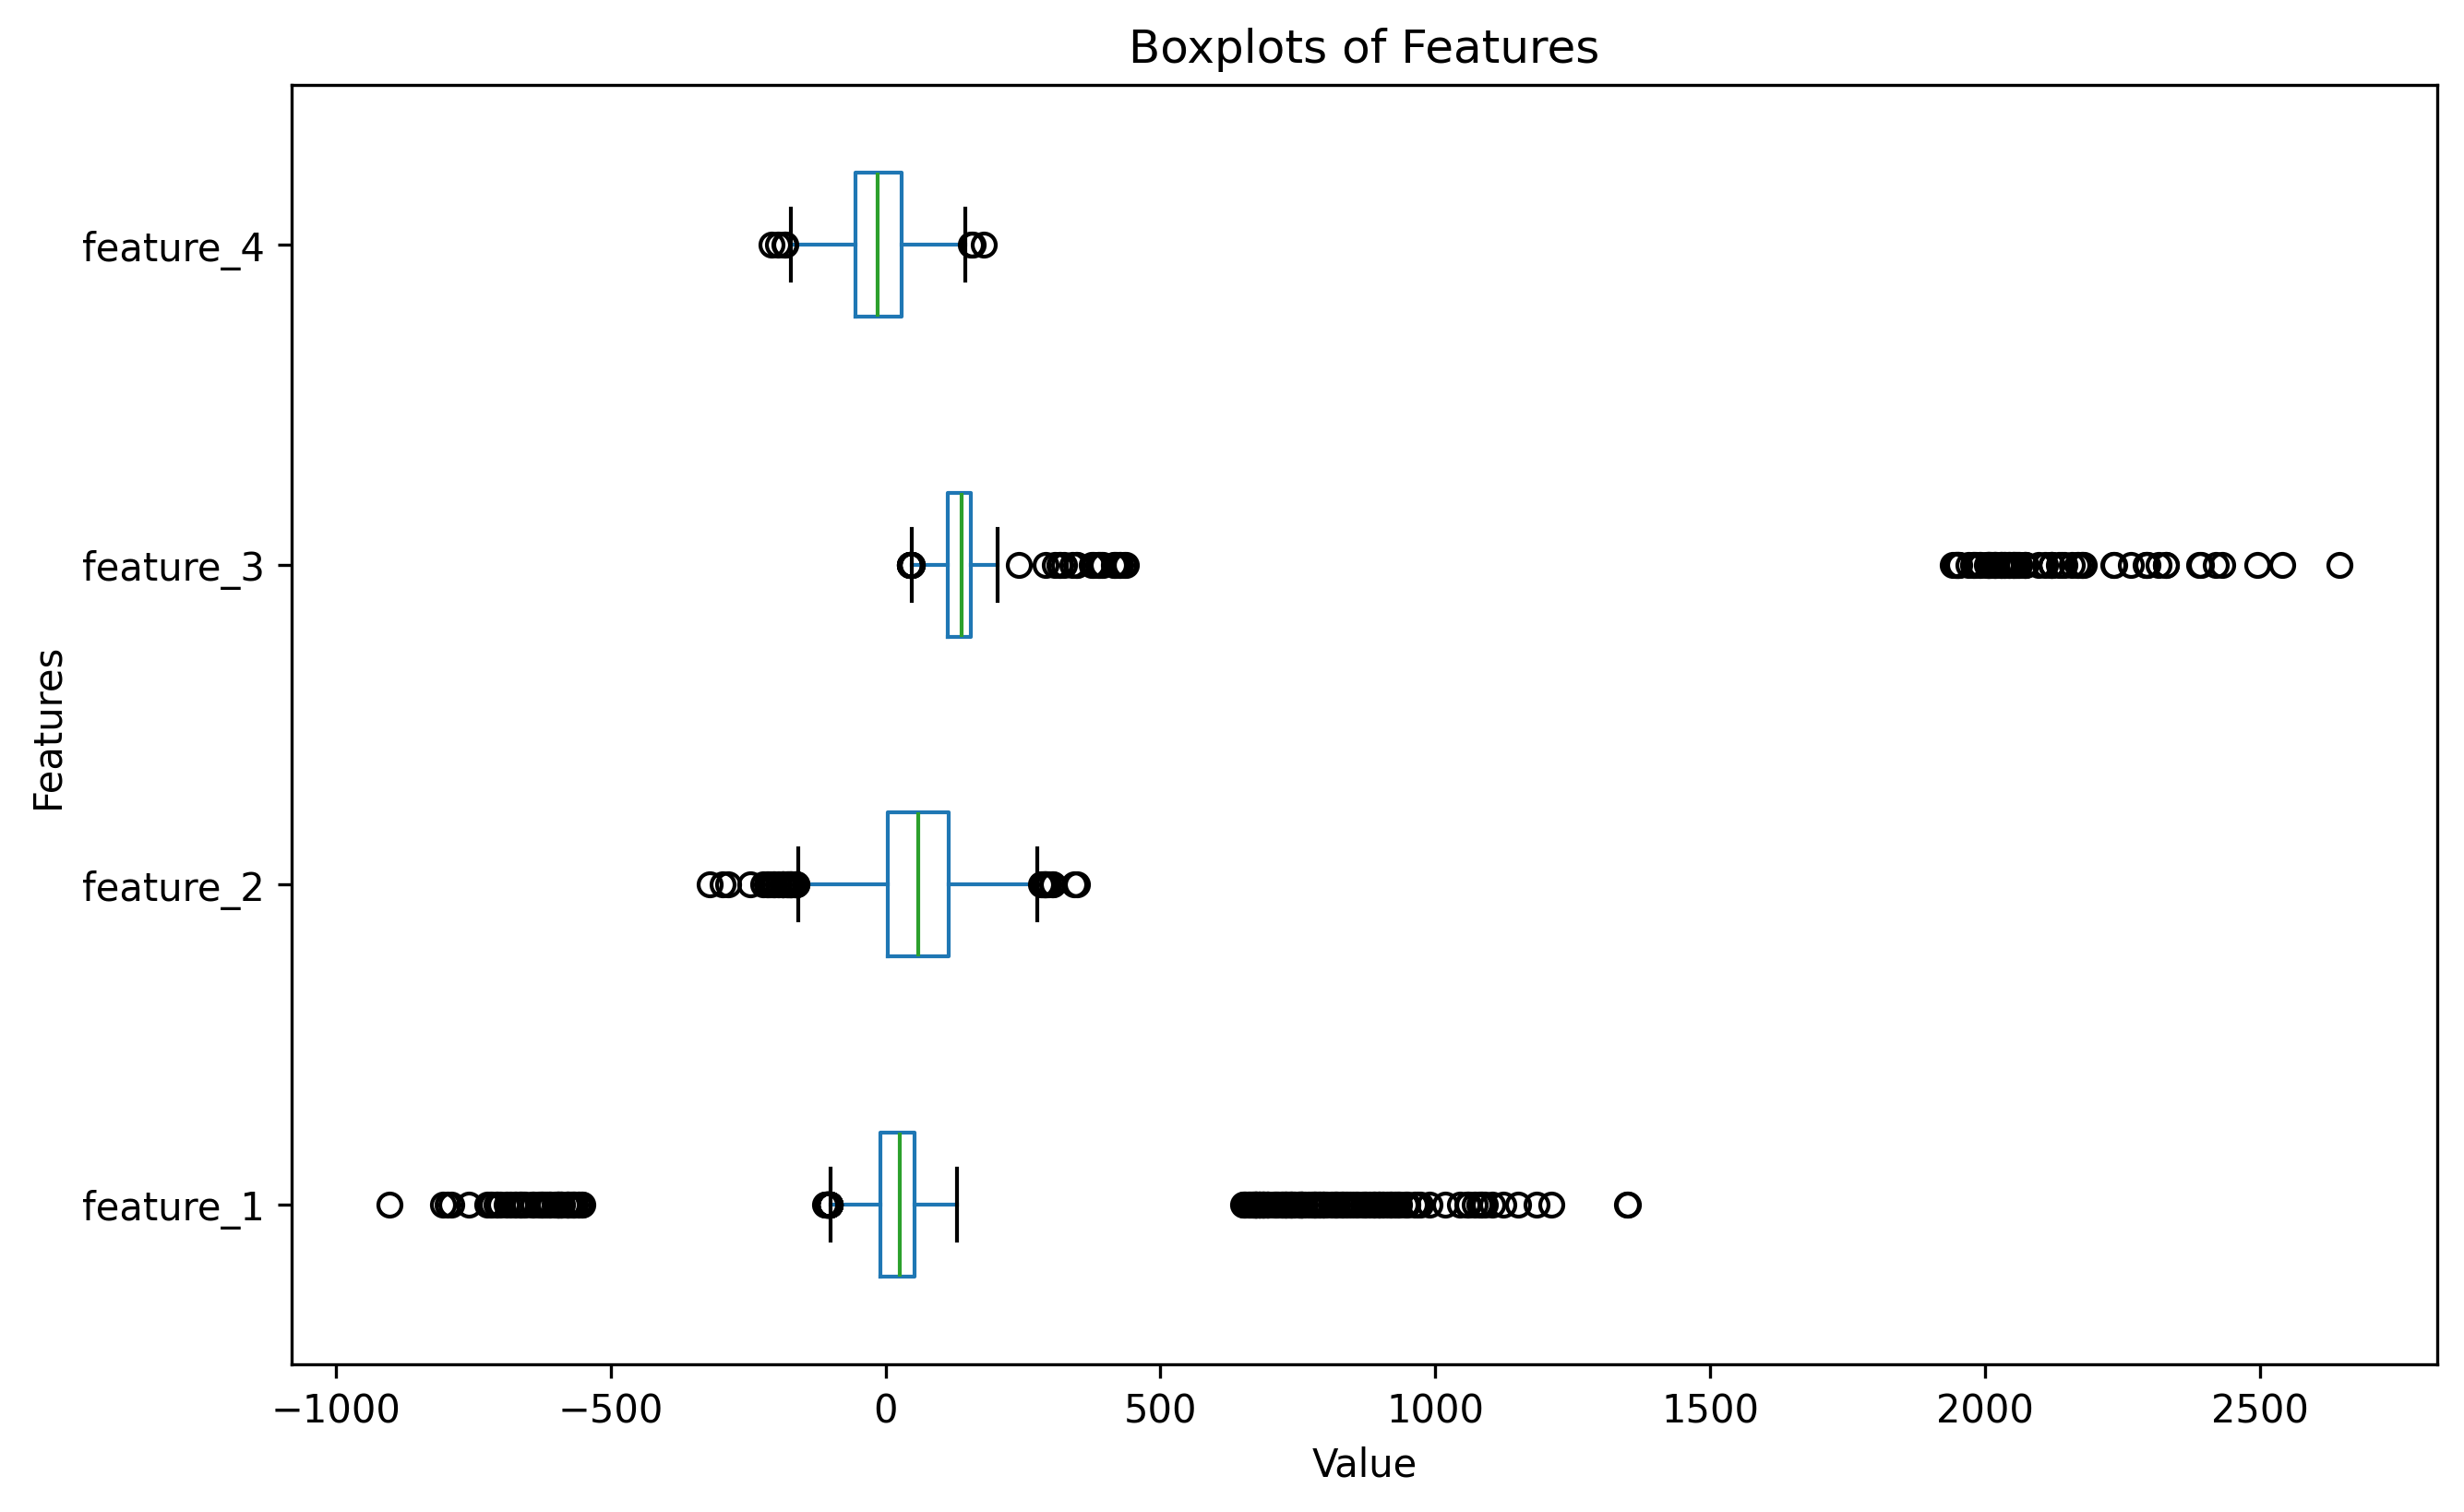

In [134]:

import pandas as pd
import matplotlib.pyplot as plt

features = ["feature_1", "feature_2", "feature_3", "feature_4"]

plt.figure(figsize=(10, 6), dpi=300)  # High-quality figure

# Create boxplot
train[features].boxplot(grid=False, vert=False)
plt.title("Boxplots of Features")
plt.xlabel("Value")
plt.ylabel("Features")
plt.show()



feature 3 has an outragious right tail 

/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_3935/2246332158.py:11: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="Value", y="Feature", data=data_long, scale="width")


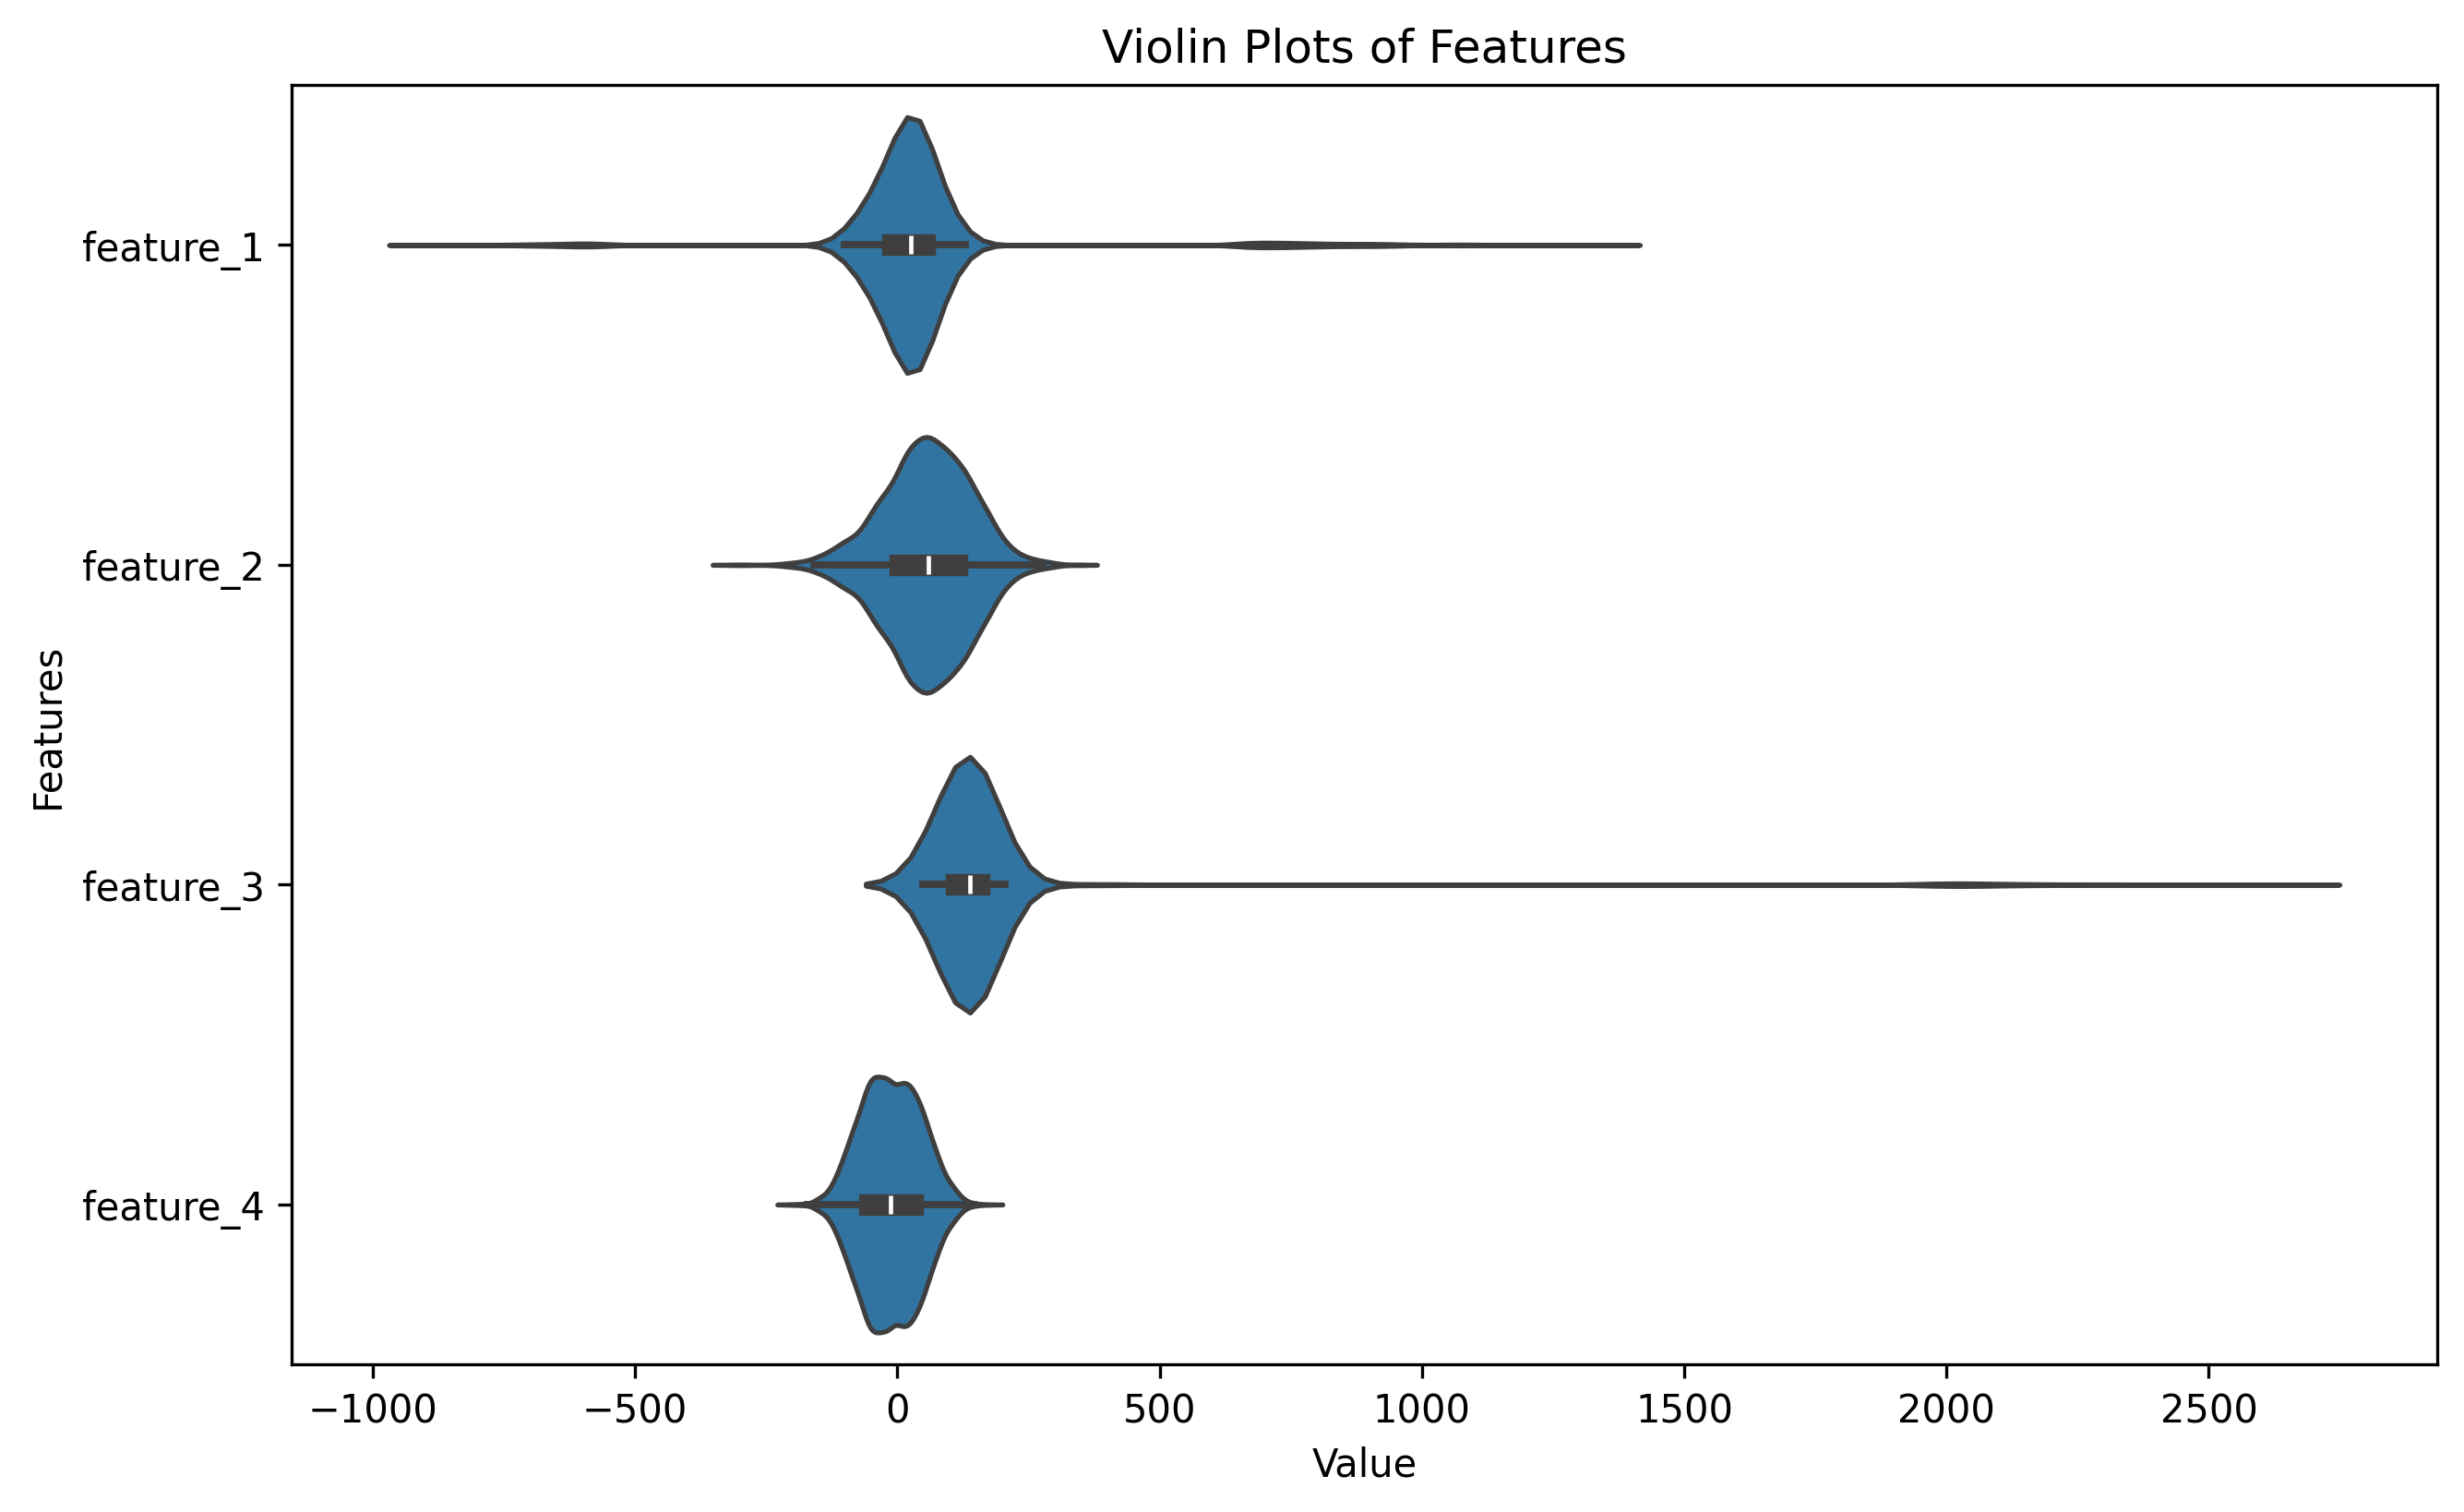

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

features = ["feature_1", "feature_2", "feature_3", "feature_4"]

# Convert data to long format for Seaborn
data_long = train[features].melt(var_name="Feature", value_name="Value")

plt.figure(figsize=(10, 6), dpi=300)  # High-quality figure
sns.violinplot(x="Value", y="Feature", data=data_long, scale="width")
plt.title("Violin Plots of Features")
plt.xlabel("Value")
plt.ylabel("Features")
plt.show()

yep, we gotta take care of feature 3 for training

In [136]:
threshold = train['feature_3'].quantile(0.99)

train.loc[train['feature_3'] > threshold, 'feature_3'] = pd.NA

print(train['feature_3'])

0       137.986051
1       126.212293
2       138.687175
3       123.782456
4       150.102046
           ...    
3936    135.415762
3937    113.602038
3938    145.438067
3939    163.350476
3940    204.445649
Name: feature_3, Length: 3941, dtype: float64


/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_3935/3086205407.py:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="Value", y="Feature", data=data_long, scale="width")


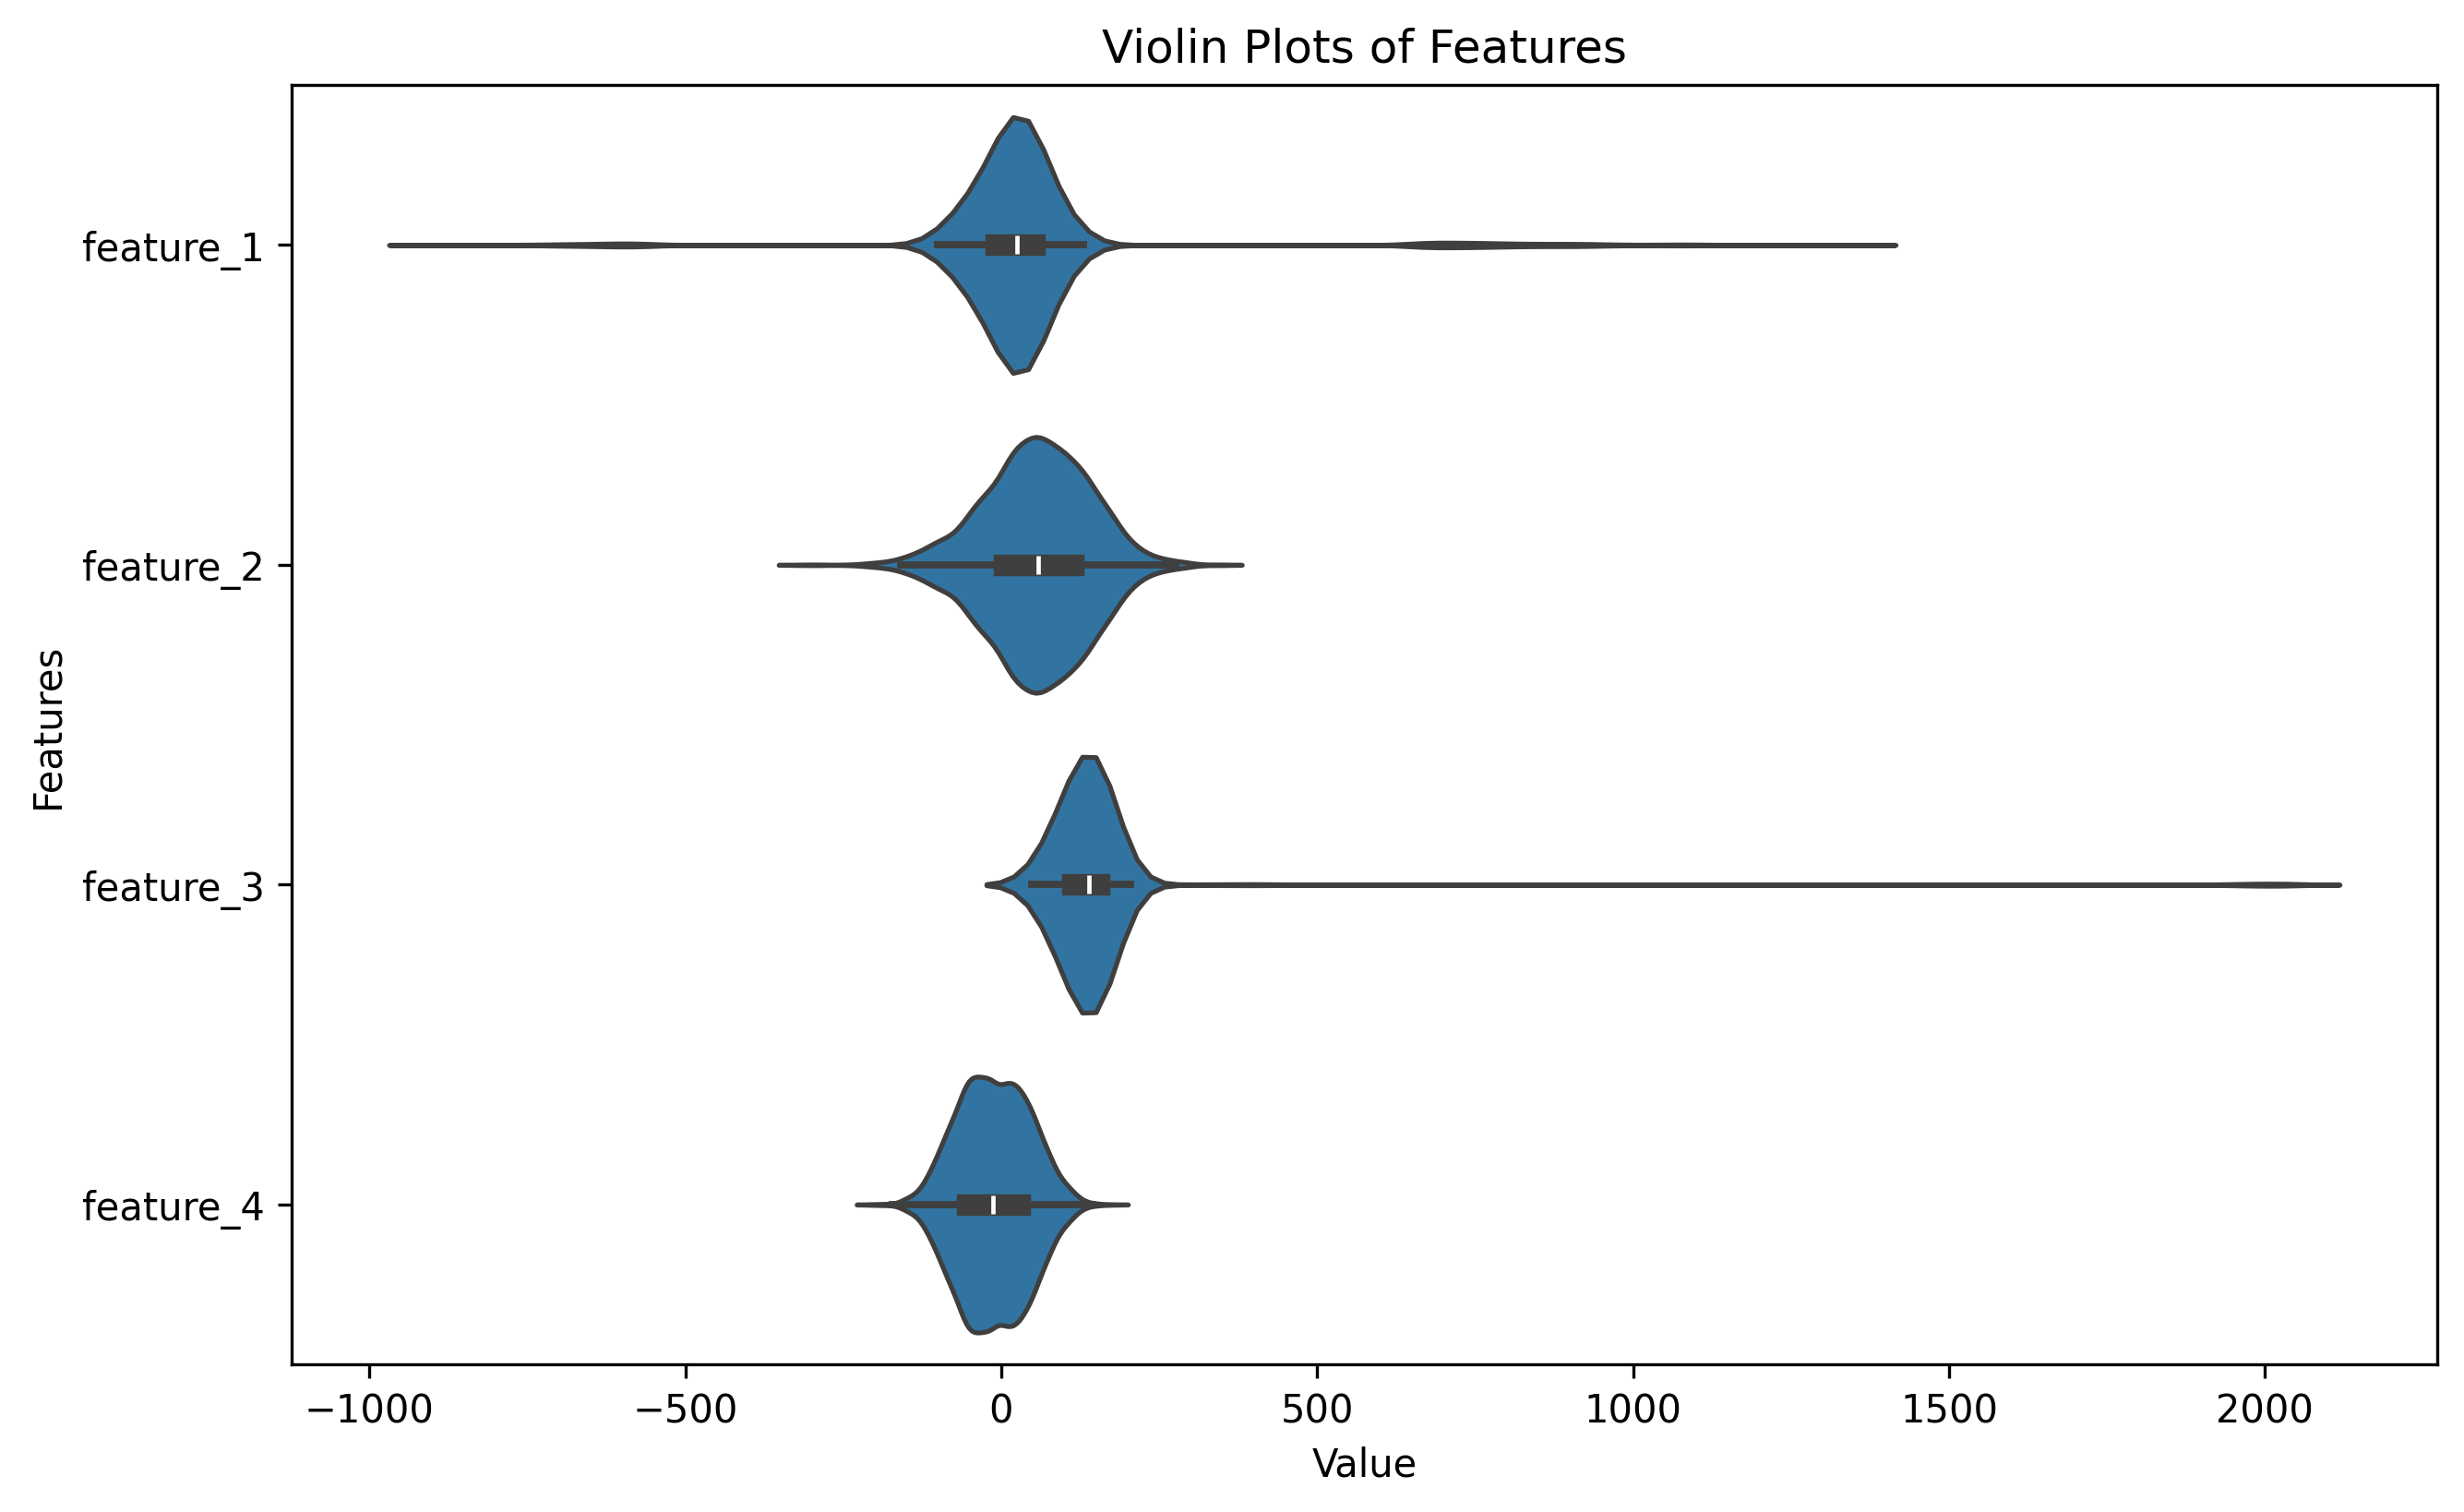

In [137]:
features = ["feature_1", "feature_2", "feature_3", "feature_4"]

# Convert data to long format for Seaborn
data_long = train[features].melt(var_name="Feature", value_name="Value")

plt.figure(figsize=(10, 6), dpi=300)  # High-quality figure
sns.violinplot(x="Value", y="Feature", data=data_long, scale="width")
plt.title("Violin Plots of Features")
plt.xlabel("Value")
plt.ylabel("Features")
plt.show()

this is acceptable, replace the missing values with median 

In [138]:
median_value = train['feature_3'].median()

train['feature_3'].fillna(median_value, inplace=True)

train.rename(columns={'feature_3': 'feature_3_impute'}, inplace=True)



median_value = test['feature_3'].median()

test['feature_3'].fillna(median_value, inplace=True)

test.rename(columns={'feature_3': 'feature_3_impute'}, inplace=True)


/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_3935/786129146.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['feature_3'].fillna(median_value, inplace=True)
/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_3935/786129146.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

sort by ID and date so that if feature 2 is missing we can replace it with the next year or the previous years value

In [139]:
train['date'] = pd.to_datetime(train['date']).dt.year
test['date'] = pd.to_datetime(test['date']).dt.year

def impute_feature_2(df):
    df = df.sort_values(by=['id', 'date'])  
    df['feature_2'] = df['feature_2'].fillna(method='bfill') 
    df['feature_2'] = df['feature_2'].fillna(method='ffill') 
    return df

train = train.groupby('id', group_keys=False).apply(impute_feature_2)
test = test.groupby('id', group_keys=False).apply(impute_feature_2)

train.rename(columns={'feature_2': 'feature_2_impute'}, inplace=True)
test.rename(columns={'feature_2': 'feature_2_impute'}, inplace=True)

train = train.dropna(subset=['feature_2_impute'])
test = test.dropna(subset=['feature_2_impute'])

display(train.head())

/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_3935/108770374.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['feature_2'] = df['feature_2'].fillna(method='bfill')
/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_3935/108770374.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['feature_2'] = df['feature_2'].fillna(method='ffill')
/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_3935/108770374.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train = train.groupby('id', group_

,feature_1,feature_2_impute,feature_3_impute,feature_4,id,date,y
0,39.165085,60.253765,137.986051,-35.462685,50501,2000,active
1,-12.614289,57.959237,126.212293,44.420647,50501,2001,90+DPD
2,0.043813,-39.293907,138.687175,64.944112,50501,2002,active
3,2.296984,49.996686,123.782456,-3.587873,50501,2003,active
4,7.188897,-83.533230,150.102046,95.359641,50501,2004,active


Normalize our features for the model 

,feature_1_standard,feature_2_standard,feature_3_standard,feature_4_standard,id,date,y
0,39.165085,60.253765,137.986051,-35.462685,50501,2000,0
1,-12.614289,57.959237,126.212293,44.420647,50501,2001,1
2,0.043813,-39.293907,138.687175,64.944112,50501,2002,0
3,2.296984,49.996686,123.782456,-3.587873,50501,2003,0
4,7.188897,-83.533230,150.102046,95.359641,50501,2004,0
...,...,...,...,...,...,...,...
3936,37.404213,82.740386,135.415762,-41.797518,50820,2012,0
3937,-41.998683,118.029225,113.602038,65.019912,50820,2013,1
3938,23.476915,53.978062,145.438067,35.848482,50820,2014,0
3939,74.362219,161.320617,163.350476,-14.407989,50820,2015,0


,feature_1,feature_2_impute,feature_3_impute,feature_4,id,date,y
0,2.595327,-32.891072,136.591557,49.620272,50821,2000,0
1,-5.560043,24.061365,112.975910,-30.343529,50821,2001,0
2,-50.197941,-24.986282,82.180471,-50.341907,50821,2002,0
3,89.590337,132.682123,169.336698,-27.406673,50821,2003,0
4,-22.253535,-72.280530,125.969360,66.272859,50821,2004,0
...,...,...,...,...,...,...,...
1054,709.178403,178.731833,191.995244,-61.412948,50901,2000,0
1055,0.541038,22.097372,118.980328,-20.016391,50901,2001,0
1056,38.258174,8.114327,162.322692,70.443053,50901,2002,0
1057,17.717661,55.971356,123.899602,-41.830166,50901,2003,0


/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_3935/2270975544.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['binned', categorical_var]).size().reset_index(name='count')


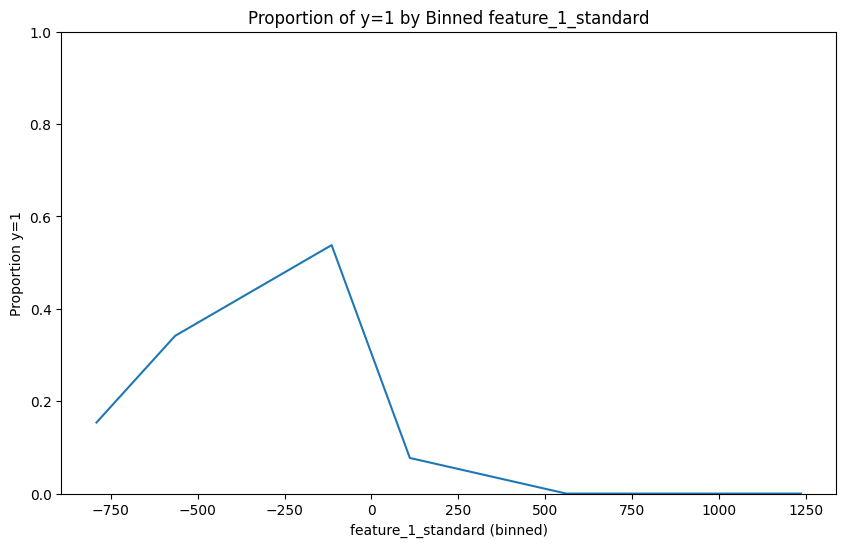

/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_3935/2270975544.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['binned', categorical_var]).size().reset_index(name='count')


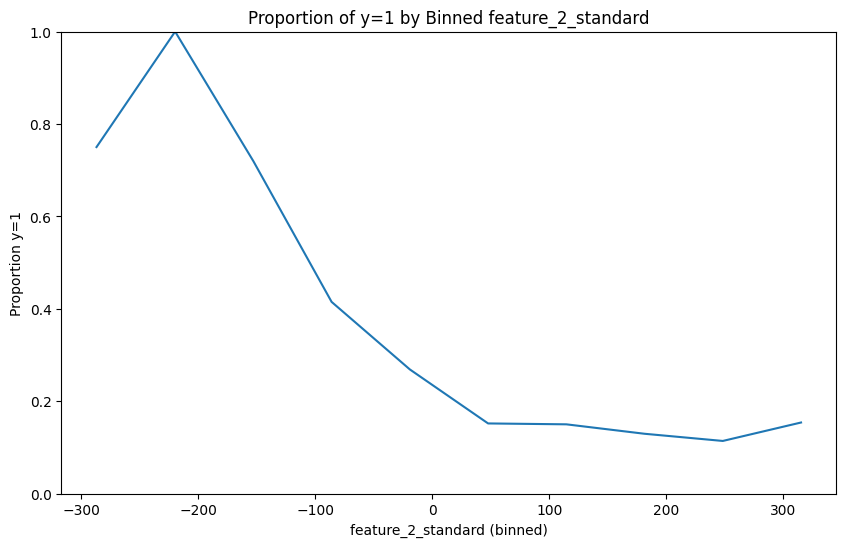

/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_3935/2270975544.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['binned', categorical_var]).size().reset_index(name='count')


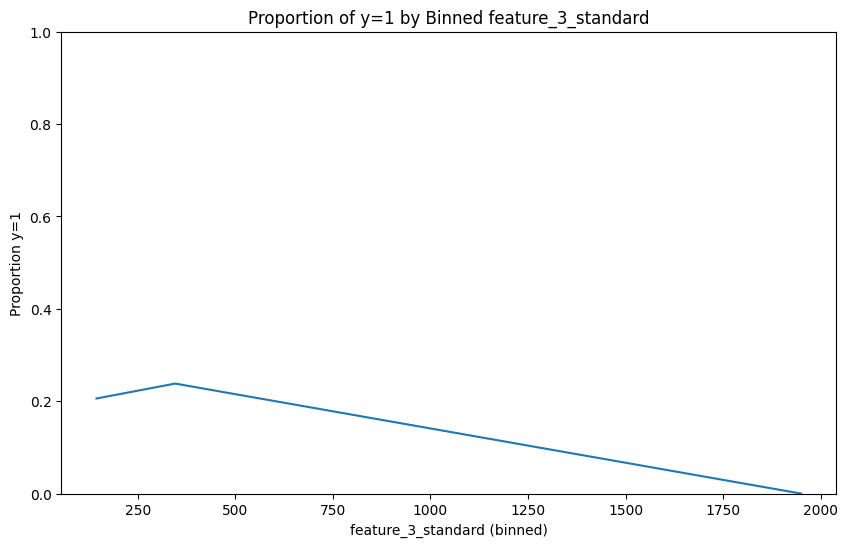

/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_3935/2270975544.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['binned', categorical_var]).size().reset_index(name='count')


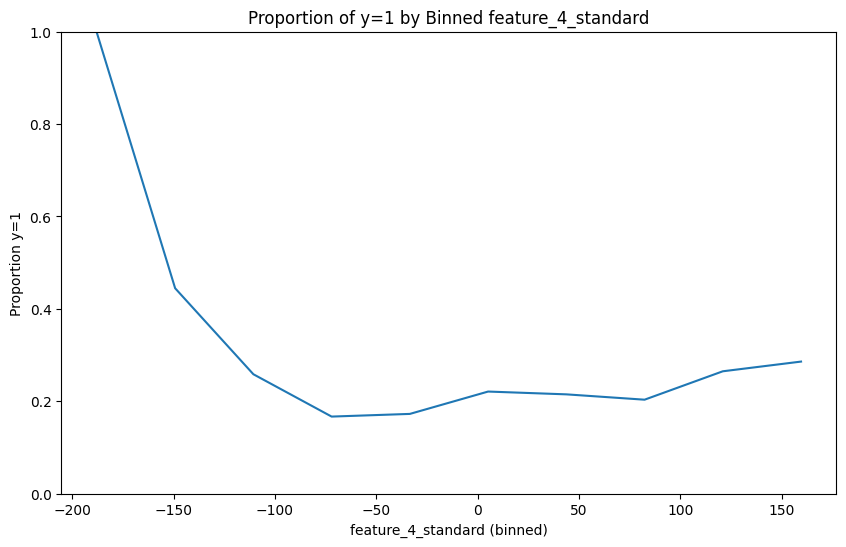

In [140]:

train.rename(columns={
    'feature_1': 'feature_1_standard',
    'feature_2_impute': 'feature_2_standard',
    'feature_3_impute': 'feature_3_standard',
    'feature_4': 'feature_4_standard'
}, inplace=True)

train['y'] = train['y'].apply(lambda x: 1 if x == "90+DPD" else 0 if x == "active" else x)
test['y'] = test['y'].apply(lambda x: 1 if x == "90+DPD" else 0 if x == "active" else x)

display(train)
display(test)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_proportion_positive(df, continuous_var, categorical_var='y', positive_value=1, bins=10):
    # Create bins for the continuous variable
    df['binned'] = pd.cut(df[continuous_var], bins=bins)

    # Group by the binned variable and the category to get counts
    grouped = df.groupby(['binned', categorical_var]).size().reset_index(name='count')
    
    # Pivot so that each bin is a row and categories form columns
    # This will give something like:
    # binned          0    1
    # (x0, x1]       x    y
    pivot = grouped.pivot(index='binned', columns=categorical_var, values='count').fillna(0)

    # Calculate total and positive counts for each bin
    total_count = pivot.sum(axis=1)
    positive_count = pivot[positive_value]
    
    # Compute the proportion of positive outcomes
    proportion_positive = positive_count / total_count

    # Create a DataFrame for plotting
    # Extract bin centers from the intervals
    plot_df = pd.DataFrame({
        'bin_center': pivot.index.map(lambda interval: interval.mid),
        'proportion_positive': proportion_positive
    })

    # Plot the proportion of positive outcomes by bin
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='bin_center', y='proportion_positive', data=plot_df)
    plt.title(f'Proportion of {categorical_var}={positive_value} by Binned {continuous_var}')
    plt.xlabel(f"{continuous_var} (binned)")
    plt.ylabel(f"Proportion {categorical_var}={positive_value}")
    plt.ylim(0, 1)  # proportions range from 0 to 1
    plt.show()


plot_proportion_positive(train, 'feature_1_standard', 'y', positive_value=1, bins=10)
plot_proportion_positive(train, 'feature_2_standard', 'y', positive_value=1, bins=10)
plot_proportion_positive(train, 'feature_3_standard', 'y', positive_value=1, bins=10)
plot_proportion_positive(train, 'feature_4_standard', 'y', positive_value=1, bins=10)



In [143]:
features = ['feature_1_standard', 'feature_2_standard', 'feature_3_standard', 'feature_4_standard']


for feature in features:
    train[feature] = (train[feature] - train[feature].mean(skipna=True)) / train[feature].std(skipna=True)


train.rename(columns={
    'feature_1_standard': 'feature_1_standard',
    'feature_2_standard': 'feature_2_standard',
    'feature_3_standard': 'feature_3_standard',
    'feature_4_standard': 'feature_4_standard'
}, inplace=True)


for feature in features:
    test[feature] = (test[feature] - test[feature].mean(skipna=True)) / test[feature].std(skipna=True)


test.rename(columns={
    'feature_1_standard': 'feature_1_standard',
    'feature_2_standard': 'feature_2_standard',
    'feature_3_standard': 'feature_3_standard',
    'feature_4_standard': 'feature_4_standard'
}, inplace=True)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_proportion_positive(df, continuous_var, categorical_var='y', positive_value=1, bins=50):
    # Create bins for the continuous variable
    df['binned'] = pd.cut(df[continuous_var], bins=bins)

    # Group by the binned variable and the category to get counts
    grouped = df.groupby(['binned', categorical_var]).size().reset_index(name='count')
    
    # Pivot so that each bin is a row and categories form columns
    pivot = grouped.pivot(index='binned', columns=categorical_var, values='count').fillna(0)

    # Calculate total and positive counts for each bin
    total_count = pivot.sum(axis=1)
    positive_count = pivot[positive_value]
    
    # Compute the proportion of positive outcomes
    proportion_positive = positive_count / total_count

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame({
        'bin_center': pivot.index.map(lambda interval: interval.mid),
        'proportion_positive': proportion_positive
    })

    # Plot the proportion of positive outcomes by bin with points
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='bin_center', y='proportion_positive', data=plot_df, color='blue', s=50)

    # Add a smoother line using lowess
    sns.regplot(x='bin_center', y='proportion_positive', data=plot_df, 
                scatter=False, lowess=True, color='red', line_kws={'lw':2})

    plt.title(f'Proportion of {categorical_var}={positive_value} by Binned {continuous_var}')
    plt.xlabel(f"{continuous_var} (binned)")
    plt.ylabel(f"Proportion {categorical_var}={positive_value}")
    plt.ylim(0, 1)
    plt.show()


plot_proportion_positive(train, 'feature_1_standard', 'y', positive_value=1, bins=50)
plot_proportion_positive(train, 'feature_2_standard', 'y', positive_value=1, bins=50)
plot_proportion_positive(train, 'feature_3_standard', 'y', positive_value=1, bins=50)
plot_proportion_positive(train, 'feature_4_standard', 'y', positive_value=1, bins=50)

KeyError: 'feature_1_standard'

build a logistic regression model 

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


x_train = train[['feature_1_standard', 'feature_2_standard', 'feature_3_standard', 'feature_4_standard']] #training predictor

y_train = train['y'] # training response 

x_test = test[['feature_1_standard', 'feature_2_standard', 'feature_3_standard', 'feature_4_standard']] #test predictor

y_test = test[['y']] # test response 

model = LogisticRegression()
model.fit(x_train, y_train) # train the model on predictor and response from training data 


y_pred = model.predict(x_test) # evaluate model on test predictors for predicted binary outcome 

y_pred_prob = model.predict_proba(x_test)  # evaluate model on test data for coresponding probabilities of predicted outcome 

test['prob'] = y_pred_prob[:,1] # appending the probability posative outcome column to test for evaluation of ROC curve 


print(classification_report(y_test, y_pred)) # compair actual test response with predicted test response 

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       845
           1       0.18      0.04      0.07       214

    accuracy                           0.77      1059
   macro avg       0.49      0.50      0.47      1059
weighted avg       0.67      0.77      0.71      1059



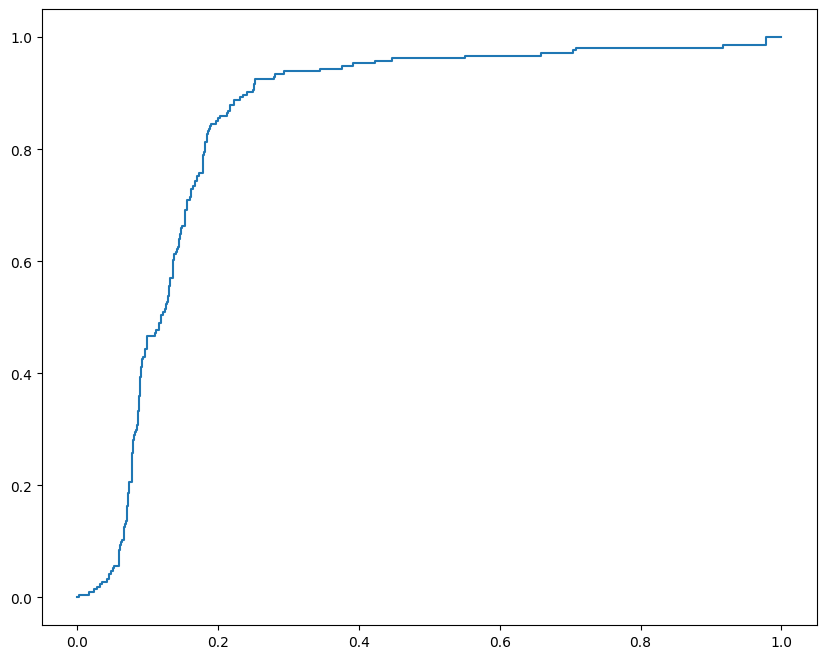

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np


fpr, tpr, thresholds = roc_curve(test['y'], test['prob'])

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))

roc_curve = plt.plot(fpr, tpr)


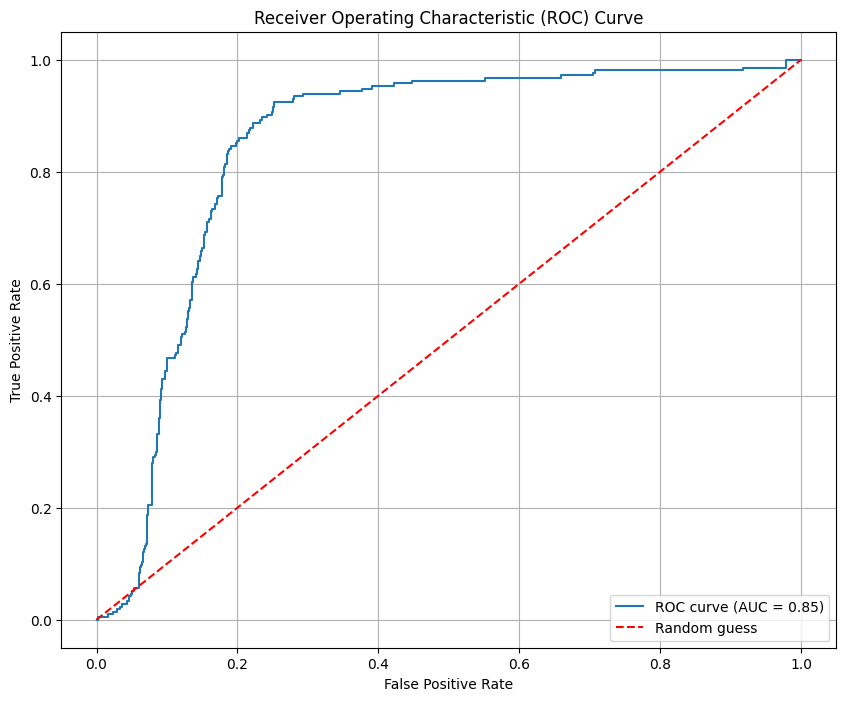

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Assuming test['y'] is the ground truth labels and test['prob'] is the predicted probabilities
fpr, tpr, thresholds = roc_curve(test['y'], test['prob'])

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random guess')  # Add diagonal for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()